# Dockers:
- Docker is a container whichis used to (transfer) image the code/application in different environment irrespective of OS, Hardware, RAM or other Config
- For instance, if I develop code in MacOS and send to QA, QA will get bugs because of different configuration and code wont run. 

### Advantages
- Environemnt Standardization
- Build once and can ve deployed anywhere
- Probablility 
- Isolation 


#### Virtual machine does the same thing, why do we need docker? 
- Virtual machine provides environmental standardization, isolation and all other properties, yet why do we prefer docker?
- Using virtual machine would give few problems like:
- VMs shares same resources like HD, RAM and network server. If VM1 is not working, respirces provided to VM1 is blocked and can not be used by other VMs. That is, if VM2 and VM3 needsmore HD or RAM, other VM can’t share the resources. 
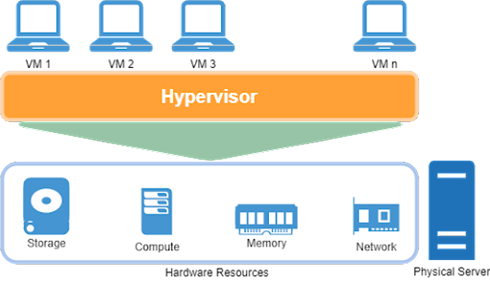

#### How docker solves this? 
Dockers are built on OS and have different
- Process ID
- Network config (different ports)
- Root folder (whole new root folder for different docks)

#### Dockers can also share the resources when that particular dock is not working. 
- How this is done? 
- Docker uses virtualisation and get environmental standardization and isolation. 
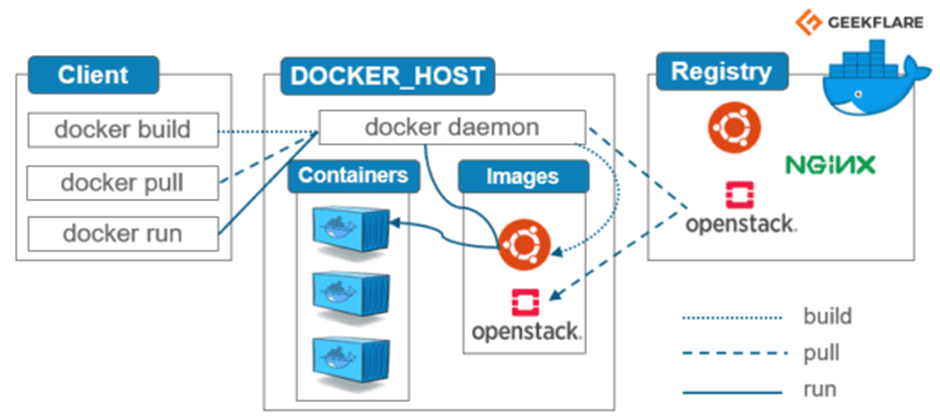

### Docker implementation example

### Bank Note Authentication

#### How to use Dockers?
- To use dockers, implement flask first 

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.
Class 0: not authentic
Class 1: Authentic

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('BankNote_Authentication.csv')
##Dataset Link: https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data
# from UCI 

In [4]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [5]:
### Independent and Dependent features
X=df.iloc[:,:-1] # get all columns except last
y=df.iloc[:,-1] # get only last column 

In [10]:
X.head() #independant features

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [12]:
y.head(20) # dependant feature index with y values. Mind this has just one column (one in left is index)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: class, dtype: int64

In [14]:
### Train Test Split
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0) #30% test data

In [17]:
# As this is classfication problem, I have considered Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
## Prediction
y_pred=classifier.predict(X_test)

In [19]:
### Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [20]:
score

0.9902912621359223

### Docker in ML

- Whenever I create a project in VSC or any other application, I create a new environment and download all necessary requirements(libraries). 
- Github has everything, to replicate same in my machine, I will face some challenges. This can be solved by using docker.


### Pickle file
- Pickle is used for serialization (converting Object memory in byte stream) and de-serialization. 
- AKA, Marshalling or Flattening
- Pickling doesnt compress files.

#### When not to use Pickle?
- WHen different program language is used
- When different versions of Python is used. 
- Do not unpickle from unknown sources for security reasons. 

#### Pickle vs Json
- JavaScript Object Notation. 
- JSON is a lightweight data-interchange format. JSON is plain text written in JavaScript object notation. 
- JSON is used to send data between computers.
- JSON is language independant and it is faster
- But, pickle is best for python. 


In [14]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb") # create a new pkl file 
pickle.dump(classifier, pickle_out) # store/dump object classifier.classifier=RandomForestClassifier()
pickle_out.close() 
# pickle has to be closed so that it'd be saved

In [22]:
# using pickle, predict the outcome 
# I have passed values using predict() and used classifier object 
classifier.predict([[2,3,4,1]])

C:\Users\vidieme\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

### Next steps:
- Go to spyder and open flask_api.py
- 